In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_absolute_error
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
colnames=['ID lokasi', 'Waktu','suhu min','suhu max','RH min','RH max','RH','suhu','Kode cuaca','arah angin','kec angin'] 
cuaca = pd.read_csv('/Users/Risanti/Documents/..code/data forecast/kecamatanforecast-jawa.csv', names=colnames, header=None)

In [3]:
df = cuaca[["suhu min","suhu max", "RH min", "RH max", "kec angin","Kode cuaca"]]
df['Kode cuaca'] = df['Kode cuaca'].shift(-1)
df = df.dropna()
df.head()

C:\Users\Risanti\AppData\Local\Temp\ipykernel_7672\3266837968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kode cuaca'] = df['Kode cuaca'].shift(-1)


,suhu min,suhu max,RH min,RH max,kec angin,Kode cuaca
4,23.0,33.0,60.0,95.0,10,3.0
12,22.0,32.0,60.0,95.0,10,3.0
20,22.0,31.0,60.0,95.0,10,3.0
26,25.0,28.0,85.0,95.0,10,80.0
30,24.0,26.0,95.0,95.0,10,1.0


In [4]:
kode = []
for elem in df["Kode cuaca"] :
    if elem <= 4 :
        kode.append(0)        
    elif elem >= 60 :
        kode.append(1)
    else :
        kode.append(2)

df["Cuaca"] = kode
df = df.drop("Kode cuaca", axis=1)
mean = df.mean()
std = df.std()

# Menentukan batas atas dan batas bawah untuk outliers
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

# Menghapus baris yang mengandung outliers
df2 = df[(df > lower_bound) & (df < upper_bound)].dropna()
df2

,suhu min,suhu max,RH min,RH max,kec angin,Cuaca
4,23.0,33.0,60.0,95.0,10.0,0.0
12,22.0,32.0,60.0,95.0,10.0,0.0
20,22.0,31.0,60.0,95.0,10.0,0.0
26,25.0,28.0,85.0,95.0,10.0,1.0
30,24.0,26.0,95.0,95.0,10.0,0.0
...,...,...,...,...,...,...
8052,24.0,31.0,65.0,95.0,20.0,0.0
8060,24.0,31.0,65.0,95.0,20.0,0.0
8066,23.0,26.0,95.0,100.0,10.0,1.0
8070,23.0,25.0,85.0,100.0,10.0,1.0


In [24]:
df4 = df3['suhu min']
df4 = np.array(df4)

In [25]:
df4

array([23., 22., 22., ..., 23., 23., 23.])

In [23]:
df3 = pd.DataFrame(df2)

nama_file = 'data cuaca.csv'
df3.to_csv(nama_file, index=False)

In [6]:

##df2['Cuaca'] = df2['Cuaca'].replace(0, "Cerah")
##df2['Cuaca'] = df2['Cuaca'].replace(1, "Hujan")
##df2['Cuaca'] = df2['Cuaca'].replace(2, "Berawan")
##df2

In [7]:
### split data train dan test
train, test = train_test_split(df2, test_size=0.2, random_state=42)
X_train = train.drop("Cuaca", axis=1)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
y_train = train["Cuaca"]

X_test = test.drop("Cuaca", axis=1)
# X_test = scaler.transform(X_test)
y_test = test["Cuaca"]


In [26]:
#SVM
svc=SVC()
svc.fit(X_train,y_train)
accuracy=svc.score(X_test,y_test)
accuracy

0.669683257918552

In [9]:
#linear regression
LR = LinearRegression()
LR.fit(X_train, y_train)
accuracy=LR.score(X_test,y_test)
accuracy

0.1697370880084753

In [10]:
#decision tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
accuracy = dtc.score(X_test, y_test)
accuracy

0.8280542986425339

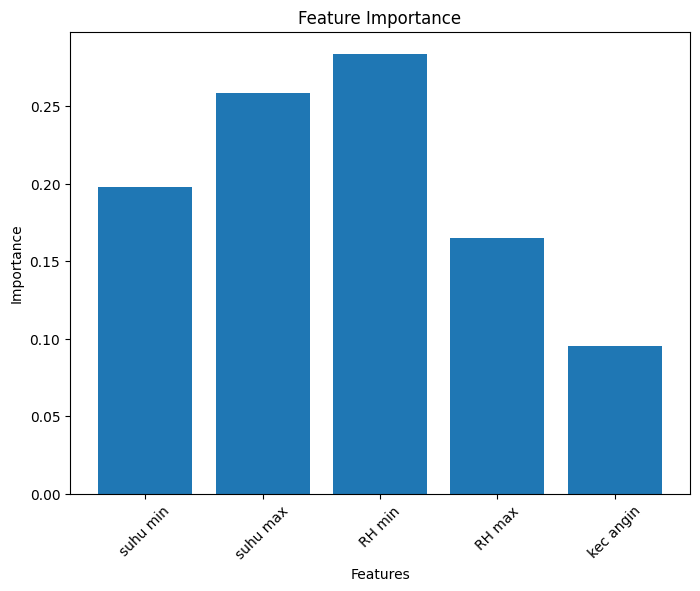

In [11]:

importance = dtc.feature_importances_

# Mendapatkan nama-nama fitur
features = X_test.columns

# Memvisualisasikan grafik feature importance
plt.figure(figsize=(8, 6))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [12]:
#gradient boosting
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)

# Mendapatkan akurasi model
accuracy = gb.score(X_test, y_test)
accuracy


0.7918552036199095

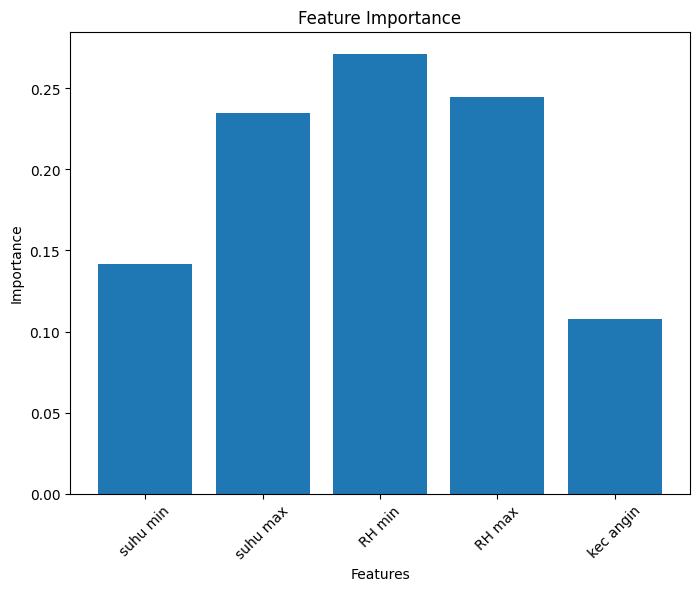

In [13]:

importance = gb.feature_importances_

# Mendapatkan nama-nama fitur
features = X_test.columns

# Memvisualisasikan grafik feature importance
plt.figure(figsize=(8, 6))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [14]:
## MLP
mlp = MLPClassifier(max_iter=1000, solver="sgd", hidden_layer_sizes=200, activation="tanh")
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print("Accuracy ",accuracy_score(y_test,y_pred))

Accuracy  0.6153846153846154


In [15]:
#rf
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Melatih model pada dataset
rf_classifier.fit(X_train, y_train)

# Mendapatkan akurasi model
accuracy = rf_classifier.score(X_test, y_test)
accuracy


0.8416289592760181

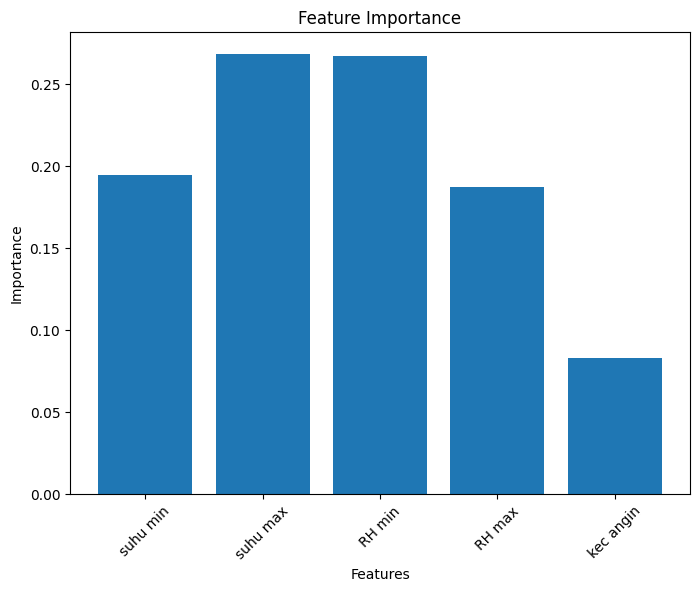

In [16]:

importance = rf_classifier.feature_importances_

# Mendapatkan nama-nama fitur
features = X_test.columns

# Memvisualisasikan grafik feature importance
plt.figure(figsize=(8, 6))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

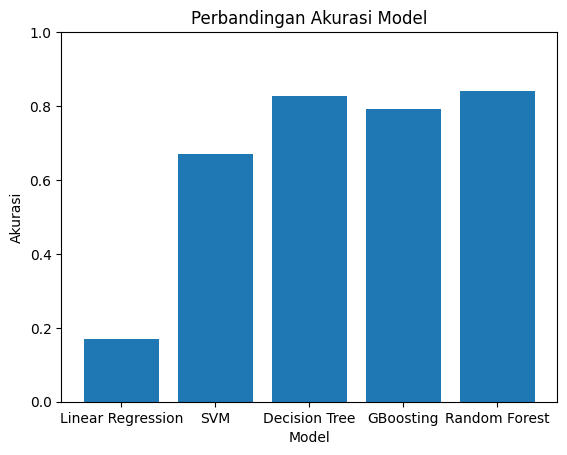

<Figure size 1000x600 with 0 Axes>

In [17]:

# Daftar model
models = ['Linear Regression', 'SVM', 'Decision Tree','GBoosting', 'Random Forest']

# Daftar akurasi untuk setiap model
accuracies = [0.1697370880084753, 0.669683257918552, 0.8280542986425339, 0.7918552036199095, 0.8416289592760181]

# Membuat grafik perbandingan akurasi
plt.bar(models, accuracies)
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)  
#plt.figure(figsize='auto')
plt.figure(figsize=(10, 6))
plt.show()
